In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_excel("/content/drive/MyDrive/Datasets/Cereberal_Dataset.xlsx")

# Analysis

In [ ]:
data

id  gender   age  hypertension  heart_disease ever_married  \
0      30669    Male   3.0             0              0           No   
1      30468    Male  58.0             1              0          Yes   
2      16523  Female   8.0             0              0           No   
3      56543  Female  70.0             0              0          Yes   
4      46136    Male  14.0             0              0           No   
...      ...     ...   ...           ...            ...          ...   
43395  56196  Female  10.0             0              0           No   
43396   5450  Female  56.0             0              0          Yes   
43397  28375  Female  82.0             1              0          Yes   
43398  27973    Male  40.0             0              0          Yes   
43399  36271  Female  82.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0          children          Rural              95.12  18.0              NaN   
1           Private          Urban              87.96  39.2     never smoked   
2           Private          Urban             110.89  17.6              NaN   
3           Private          Rural              69.04  35.9  formerly smoked   
4      Never_worked          Rural             161.28  19.1              NaN   
...             ...            ...                ...   ...              ...   
43395      children          Urban              58.64  20.4     never smoked   
43396      Govt_job          Urban             213.61  55.4  formerly smoked   
43397       Private          Urban              91.94  28.9  formerly smoked   
43398       Private          Urban              99.16  33.2     never smoked   
43399       Private          Urban              79.48  20.6     never smoked   

       stroke  
0           0  
1           0  
2           0  
3           0  
4           0  
...       ...  
43395       0  
43396       0  
43397       0  
43398       0  
43399       0  

[43400 rows x 12 columns]

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 43400 non-null  int64  
 1   gender             43400 non-null  object 
 2   age                43400 non-null  float64
 3   hypertension       43400 non-null  int64  
 4   heart_disease      43400 non-null  int64  
 5   ever_married       43400 non-null  object 
 6   work_type          43400 non-null  object 
 7   Residence_type     43400 non-null  object 
 8   avg_glucose_level  43400 non-null  float64
 9   bmi                41938 non-null  float64
 10  smoking_status     30108 non-null  object 
 11  stroke             43400 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 4.0+ MB


In [ ]:
data.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [ ]:
data.describe()

id           age  hypertension  heart_disease  \
count  43400.000000  43400.000000  43400.000000   43400.000000   
mean   36326.142350     42.217894      0.093571       0.047512   
std    21072.134879     22.519649      0.291235       0.212733   
min        1.000000      0.080000      0.000000       0.000000   
25%    18038.500000     24.000000      0.000000       0.000000   
50%    36351.500000     44.000000      0.000000       0.000000   
75%    54514.250000     60.000000      0.000000       0.000000   
max    72943.000000     82.000000      1.000000       1.000000   

       avg_glucose_level           bmi        stroke  
count       43400.000000  41938.000000  43400.000000  
mean          104.482750     28.605038      0.018041  
std            43.111751      7.770020      0.133103  
min            55.000000     10.100000      0.000000  
25%            77.540000     23.200000      0.000000  
50%            91.580000     27.700000      0.000000  
75%           112.070000     32.900000      0.000000  
max           291.050000     97.600000      1.000000

In [ ]:
data.isna().sum()

id                       0
gender                   0
age                      0
hypertension             0
heart_disease            0
ever_married             0
work_type                0
Residence_type           0
avg_glucose_level        0
bmi                   1462
smoking_status       13292
stroke                   0
dtype: int64

* got 1432 null values in bmi - numerical column
* also got 13292 null values in smoking_status - categorical

# Data Cleaning
* Handle missing values
* outliers

In [ ]:
data = data.drop(data[['id']], axis=1)

drop irrelevant column - id

In [ ]:
data['bmi'].fillna(data['bmi'].mean(), inplace=True)

filling the null values of numerical column - bmi using mean() method

In [ ]:
data['smoking_status'].value_counts()

smoking_status
never smoked       16053
formerly smoked     7493
smokes              6562
Name: count, dtype: int64

In [ ]:
data['smoking_status'].fillna('Missing', inplace=True)

filling the null values of categorical column - smoking_status

In [ ]:
data.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

no null values now

### cheking for outliers

In [ ]:
for column in data.columns:
    fig =px.box(data,
                y=data[column],
                color_discrete_sequence=['indianred'])
    fig.show()
    plt.tight_layout()
    plt.show()

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

# bmi outliers

In [ ]:
# IQR
Q1 = data['bmi'].quantile(0.25)
Q3 = data['bmi'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = data[(data['bmi'] < lower_bound) | (data['bmi'] > upper_bound)]
outliers

gender   age  hypertension  heart_disease ever_married      work_type  \
5      Female  47.0             0              0          Yes        Private   
9      Female  74.0             1              0          Yes  Self-employed   
21     Female  57.0             1              0          Yes        Private   
86     Female  52.0             0              0          Yes        Private   
94     Female  37.0             0              0          Yes        Private   
...       ...   ...           ...            ...          ...            ...   
43224  Female  54.0             0              0          Yes        Private   
43239    Male  21.0             0              0           No        Private   
43279    Male  67.0             0              0          Yes  Self-employed   
43355  Female  46.0             0              0          Yes        Private   
43396  Female  56.0             0              0          Yes       Govt_job   

      Residence_type  avg_glucose_level   bmi   smoking_status  stroke  
5              Urban             210.95  50.1          Missing       0  
9              Urban             205.84  54.6     never smoked       0  
21             Rural             129.54  60.9           smokes       0  
86             Urban              82.24  54.7  formerly smoked       0  
94             Rural              75.18  48.2  formerly smoked       0  
...              ...                ...   ...              ...     ...  
43224          Urban              63.43  47.1          Missing       0  
43239          Urban              83.78  54.9     never smoked       0  
43279          Rural             242.61  47.0          Missing       0  
43355          Rural              99.81  53.2          Missing       0  
43396          Urban             213.61  55.4  formerly smoked       0  

[1084 rows x 11 columns]

In [ ]:
data['bmi'] = np.where(data['bmi'] < lower_bound, lower_bound, data['bmi'])
data['bmi'] = np.where(data['bmi'] > upper_bound, upper_bound, data['bmi'])
data

gender   age  hypertension  heart_disease ever_married     work_type  \
0        Male   3.0             0              0           No      children   
1        Male  58.0             1              0          Yes       Private   
2      Female   8.0             0              0           No       Private   
3      Female  70.0             0              0          Yes       Private   
4        Male  14.0             0              0           No  Never_worked   
...       ...   ...           ...            ...          ...           ...   
43395  Female  10.0             0              0           No      children   
43396  Female  56.0             0              0          Yes      Govt_job   
43397  Female  82.0             1              0          Yes       Private   
43398    Male  40.0             0              0          Yes       Private   
43399  Female  82.0             0              0          Yes       Private   

      Residence_type  avg_glucose_level   bmi   smoking_status  stroke  
0              Rural              95.12  18.0          Missing       0  
1              Urban              87.96  39.2     never smoked       0  
2              Urban             110.89  17.6          Missing       0  
3              Rural              69.04  35.9  formerly smoked       0  
4              Rural             161.28  19.1          Missing       0  
...              ...                ...   ...              ...     ...  
43395          Urban              58.64  20.4     never smoked       0  
43396          Urban             213.61  46.4  formerly smoked       0  
43397          Urban              91.94  28.9  formerly smoked       0  
43398          Urban              99.16  33.2     never smoked       0  
43399          Urban              79.48  20.6     never smoked       0  

[43400 rows x 11 columns]

In [ ]:
fig =px.box(data,
                y=data['bmi'],
                color_discrete_sequence=['indianred'])
fig.show()
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

no outliers in the bmi column

# avg_glucose_level outliers


In [ ]:
# IQR
Q1 = data['avg_glucose_level'].quantile(0.25)
Q3 = data['avg_glucose_level'].quantile(0.75)
IQR = Q3 - Q1

# bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = data[(data['avg_glucose_level'] < lower_bound) | (data['avg_glucose_level'] > upper_bound)]
outliers

gender   age  hypertension  heart_disease ever_married      work_type  \
5      Female  47.0             0              0          Yes        Private   
7      Female  75.0             0              1          Yes  Self-employed   
9      Female  74.0             1              0          Yes  Self-employed   
23       Male  71.0             0              0          Yes        Private   
28     Female  54.0             0              0          Yes        Private   
...       ...   ...           ...            ...          ...            ...   
43381    Male  45.0             0              0          Yes        Private   
43384  Female  65.0             0              0          Yes        Private   
43388  Female  64.0             1              0          Yes       Govt_job   
43390  Female  69.0             0              0          Yes  Self-employed   
43396  Female  56.0             0              0          Yes       Govt_job   

      Residence_type  avg_glucose_level        bmi   smoking_status  stroke  
5              Urban             210.95  46.400000          Missing       0  
7              Rural             243.53  27.000000     never smoked       0  
9              Urban             205.84  46.400000     never smoked       0  
23             Urban             198.21  27.300000  formerly smoked       0  
28             Rural             206.72  26.700000     never smoked       0  
...              ...                ...        ...              ...     ...  
43381          Urban             214.05  40.500000  formerly smoked       0  
43384          Rural             200.92  30.700000  formerly smoked       0  
43388          Rural             228.43  28.605038           smokes       0  
43390          Urban             229.85  31.200000     never smoked       0  
43396          Urban             213.61  46.400000  formerly smoked       0  

[4978 rows x 11 columns]

In [ ]:
data['avg_glucose_level'] = np.where(data['avg_glucose_level'] < lower_bound, lower_bound, data['avg_glucose_level'])
data['avg_glucose_level'] = np.where(data['avg_glucose_level'] > upper_bound, upper_bound, data['avg_glucose_level'])
data

gender   age  hypertension  heart_disease ever_married     work_type  \
0        Male   3.0             0              0           No      children   
1        Male  58.0             1              0          Yes       Private   
2      Female   8.0             0              0           No       Private   
3      Female  70.0             0              0          Yes       Private   
4        Male  14.0             0              0           No  Never_worked   
...       ...   ...           ...            ...          ...           ...   
43395  Female  10.0             0              0           No      children   
43396  Female  56.0             0              0          Yes      Govt_job   
43397  Female  82.0             1              0          Yes       Private   
43398    Male  40.0             0              0          Yes       Private   
43399  Female  82.0             0              0          Yes       Private   

      Residence_type  avg_glucose_level   bmi   smoking_status  stroke  
0              Rural             95.120  18.0          Missing       0  
1              Urban             87.960  39.2     never smoked       0  
2              Urban            110.890  17.6          Missing       0  
3              Rural             69.040  35.9  formerly smoked       0  
4              Rural            161.280  19.1          Missing       0  
...              ...                ...   ...              ...     ...  
43395          Urban             58.640  20.4     never smoked       0  
43396          Urban            163.865  46.4  formerly smoked       0  
43397          Urban             91.940  28.9  formerly smoked       0  
43398          Urban             99.160  33.2     never smoked       0  
43399          Urban             79.480  20.6     never smoked       0  

[43400 rows x 11 columns]

In [ ]:
fig =px.box(data,
                y=data['avg_glucose_level'],
                color_discrete_sequence=['indianred'])
fig.show()
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

no outliers in the avg_glucose_level column now

In [ ]:
data.sample()

gender   age  hypertension  heart_disease ever_married work_type  \
292  Female  20.0             0              0           No   Private   

    Residence_type  avg_glucose_level   bmi smoking_status  stroke  
292          Urban             127.18  31.0        Missing       0

#### finding relation between dependant features and independant features

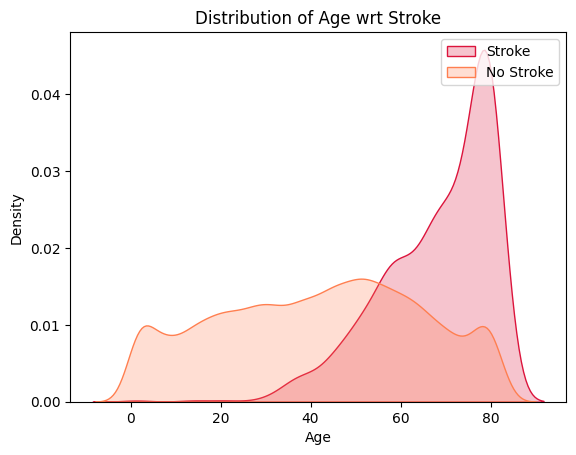

In [ ]:
sns.kdeplot(data.loc[data['stroke'] == 1]['age'], color='crimson', label='Stroke', fill=True)
sns.kdeplot(data.loc[data['stroke'] == 0]['age'], color='coral', label='No Stroke', fill=True)
plt.title('Distribution of Age wrt Stroke')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend(loc='upper right')
plt.show()

graph shows that as age increasing chances of stroke also increasing

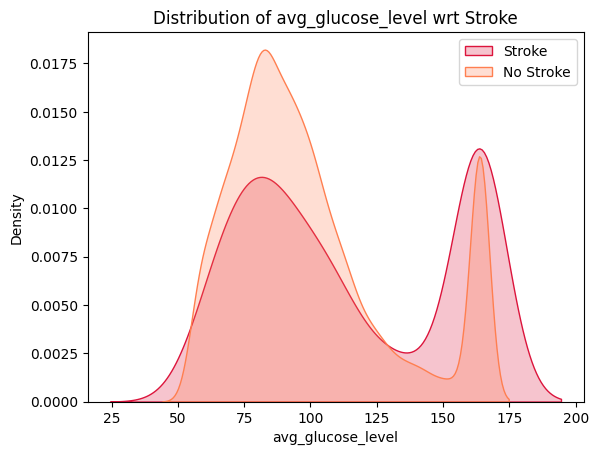

In [ ]:
sns.kdeplot(data.loc[data['stroke'] == 1]['avg_glucose_level'], color='crimson', label='Stroke', fill=True)
sns.kdeplot(data.loc[data['stroke'] == 0]['avg_glucose_level'], color='coral', label='No Stroke', fill=True)
plt.title('Distribution of avg_glucose_level wrt Stroke')
plt.xlabel('avg_glucose_level')
plt.ylabel('Density')
plt.legend(loc='upper right')
plt.show()

graph shows 2 peaks

1.   because count of patients with avg_glucose_level in 75-100 is high
2.   because we converted outliers into max value which is not consider as outlier
3.   1st peak show that avg_glucose_level in 75-100 has less chance of stroke

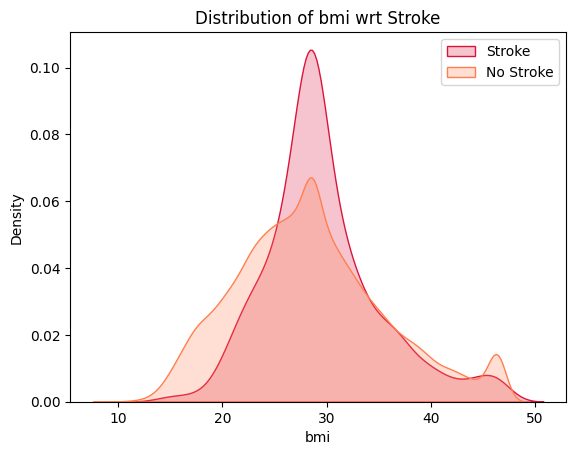

In [ ]:
sns.kdeplot(data.loc[data['stroke'] == 1]['bmi'], color='crimson', label='Stroke', fill=True)
sns.kdeplot(data.loc[data['stroke'] == 0]['bmi'], color='coral', label='No Stroke', fill=True)
plt.title('Distribution of bmi wrt Stroke')
plt.xlabel('bmi')
plt.ylabel('Density')
plt.legend(loc='upper right')
plt.show()

patients with avg bmi of 30 has more chance of stroke

In [ ]:
data['stroke'].value_counts()

stroke
0    42617
1      783
Name: count, dtype: int64

imbalanced dataset so need to balance it

# splitting dataset

In [ ]:
X = data.drop(columns=['stroke'])
y = data['stroke']

# Handle categorical columns

In [ ]:
X = pd.get_dummies(X, drop_first=True)

# Oversampling

## SMOTE :- synthetic minority over-sampling technique
generate synthetic samples of the minority class to handle the imbalanced dataset

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
smote = SMOTE(random_state=42)
X_sampled, y_sampled = smote.fit_resample(X, y)

In [ ]:
new_data = pd.DataFrame(X_sampled, columns=X.columns)
new_data['stroke'] = y_sampled

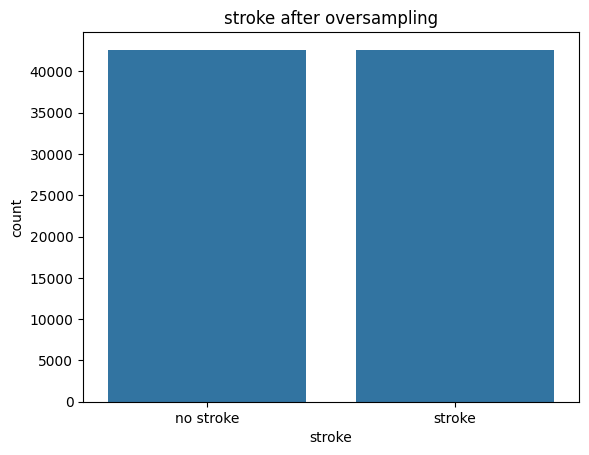

In [ ]:
stroke_count = new_data['stroke'].value_counts()
sns.barplot(x=stroke_count.index, y=stroke_count.values)
plt.title('stroke after oversampling')
plt.xlabel('stroke')
plt.ylabel('count')
plt.xticks([0, 1], ['no stroke', 'stroke'])
plt.show()

In [ ]:
X_sampled

age  hypertension  heart_disease  avg_glucose_level        bmi  \
0       3.000000             0              0          95.120000  18.000000   
1      58.000000             1              0          87.960000  39.200000   
2       8.000000             0              0         110.890000  17.600000   
3      70.000000             0              0          69.040000  35.900000   
4      14.000000             0              0         161.280000  19.100000   
...          ...           ...            ...                ...        ...   
85229  66.000000             0              0         148.702591  28.908706   
85230  81.389129             1              0         163.865000  24.833478   
85231  80.903978             0              0         163.865000  26.234430   
85232  79.191659             0              0          80.547090  26.680834   
85233  60.175653             0              0         116.246328  34.267480   

       gender_Male  gender_Other  ever_married_Yes  work_type_Never_worked  \
0             True         False             False                   False   
1             True         False              True                   False   
2            False         False             False                   False   
3            False         False              True                   False   
4             True         False             False                    True   
...            ...           ...               ...                     ...   
85229         True         False              True                   False   
85230        False         False              True                   False   
85231         True         False              True                   False   
85232        False         False              True                   False   
85233         True         False              True                   False   

       work_type_Private  work_type_Self-employed  work_type_children  \
0                  False                    False                True   
1                   True                    False               False   
2                   True                    False               False   
3                   True                    False               False   
4                  False                    False               False   
...                  ...                      ...                 ...   
85229               True                    False               False   
85230              False                     True               False   
85231               True                    False               False   
85232               True                     True               False   
85233               True                    False               False   

       Residence_type_Urban  smoking_status_formerly smoked  \
0                     False                           False   
1                      True                           False   
2                      True                           False   
3                     False                            True   
4                     False                           False   
...                     ...                             ...   
85229                  True                            True   
85230                  True                           False   
85231                  True                           False   
85232                  True                            True   
85233                  True                            True   

       smoking_status_never smoked  smoking_status_smokes  
0                            False                  False  
1                             True                  False  
2                            False                  False  
3                            False                  False  
4                            False                  False  
...                            ...                    ...  
85229                         True                  False  
85230        

In [ ]:
y_sampled.value_counts()

stroke
0    42617
1    42617
Name: count, dtype: int64

# Feature Transformation
* Scalling
* skewness

* scalling tha values in a perticular range to avoid biasness due to different values

In [ ]:
numerical_cols = ['age','bmi','avg_glucose_level']

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
X_sampled[numerical_cols] = scaler.fit_transform(X_sampled[numerical_cols])
X_sampled.sample(5)

age  hypertension  heart_disease  avg_glucose_level       bmi  \
46072  0.043312             0              0           1.592996  1.053344   
5719   1.029186             0              1           1.592996 -0.058440   
30139 -1.614747             0              0          -1.299429 -0.298587   
45756 -0.009001             0              0          -0.584135 -1.209803   
11566  1.029186             0              0          -0.099081 -0.729405   

       gender_Male  gender_Other  ever_married_Yes  work_type_Never_worked  \
46072         True         False              True                   False   
5719         False         False              True                   False   
30139         True         False             False                   False   
45756         True         False              True                   False   
11566        False         False             False                   False   

       work_type_Private  work_type_Self-employed  work_type_children  \
46072               True                    False               False   
5719                True                    False               False   
30139               True                    False               False   
45756               True                    False               False   
11566              False                     True               False   

       Residence_type_Urban  smoking_status_formerly smoked  \
46072                  True                           False   
5719                   True                           False   
30139                  True                            True   
45756                  True                           False   
11566                  True                           False   

       smoking_status_never smoked  smoking_status_smokes  
46072                         True                  False  
5719                          True                  False  
30139                        False                  False  
45756                         True                   True  
11566                         True                  False

* skewness

In [ ]:
skewed_features = X_sampled.select_dtypes(include=['float64', 'int64']).apply(lambda x: x.skew()).sort_values(ascending=False)
skewed_features

heart_disease        3.798878
hypertension         3.024318
avg_glucose_level    0.564046
bmi                  0.501922
age                 -0.764685
dtype: float64

### log transformation to reduce skewness

have to ADD 1 while providing data to the log trnsformation to avoide getting NULL values when i am passing values less than 0 or near 0

In [ ]:
skewed_features = skewed_features[skewed_features > 0.75].index
for feature in skewed_features:
    X_sampled[feature] = np.log1p(X_sampled[feature] + 1)

# skewness after transformation
skewed_features_transformed = X_sampled[skewed_features].apply(lambda x: x.skew()).sort_values(ascending=False)
skewed_features_transformed

heart_disease    3.798878
hypertension     3.024318
dtype: float64

In [ ]:
X_sampled.isna().sum()


age                               0
hypertension                      0
heart_disease                     0
avg_glucose_level                 0
bmi                               0
gender_Male                       0
gender_Other                      0
ever_married_Yes                  0
work_type_Never_worked            0
work_type_Private                 0
work_type_Self-employed           0
work_type_children                0
Residence_type_Urban              0
smoking_status_formerly smoked    0
smoking_status_never smoked       0
smoking_status_smokes             0
dtype: int64

# conversion of boolean values into binary numerical values



In [ ]:
X_sampled = X_sampled.replace({True: 1, False: 0})

In [ ]:
X_sampled

age  hypertension  heart_disease  avg_glucose_level       bmi  \
0     -2.331746      0.693147       0.693147          -0.335895 -1.750602   
1      0.132937      1.098612       0.693147          -0.536795  1.632115   
2     -2.107684      0.693147       0.693147           0.106589 -1.814427   
3      0.670686      0.693147       0.693147          -1.067665  1.105560   
4     -1.838809      0.693147       0.693147           1.520464 -1.575084   
...         ...           ...            ...                ...       ...   
85229  0.491437      0.693147       0.693147           1.167559 -0.009986   
85230  1.181061      1.098612       0.693147           1.592996 -0.660238   
85231  1.159320      0.693147       0.693147           1.592996 -0.436699   
85232  1.082587      0.693147       0.693147          -0.744792 -0.365470   
85233  0.230434      0.693147       0.693147           0.256881  0.845071   

       gender_Male  gender_Other  ever_married_Yes  work_type_Never_worked  \
0                1             0                 0                       0   
1                1             0                 1                       0   
2                0             0                 0                       0   
3                0             0                 1                       0   
4                1             0                 0                       1   
...            ...           ...               ...                     ...   
85229            1             0                 1                       0   
85230            0             0                 1                       0   
85231            1             0                 1                       0   
85232            0             0                 1                       0   
85233            1             0                 1                       0   

       work_type_Private  work_type_Self-employed  work_type_children  \
0                      0                        0                   1   
1                      1                        0                   0   
2                      1                        0                   0   
3                      1                        0                   0   
4                      0                        0                   0   
...                  ...                      ...                 ...   
85229                  1                        0                   0   
85230                  0                        1                   0   
85231                  1                        0                   0   
85232                  1                        1                   0   
85233                  1                        0                   0   

       Residence_type_Urban  smoking_status_formerly smoked  \
0                         0                               0   
1                         1                               0   
2                         1                               0   
3                         0                               1   
4                         0                               0   
...                     ...                             ...   
85229                     1                               1   
85230                     1                               0   
85231                     1                               0   
85232                     1                               1   
85233                     1                               1   

       smoking_status_never smoked  smoking_status_smokes  
0                                0                      0  
1                                1                      0  
2                                0                      0  
3                                0                      0  
4                                0                      0  
...                            ...                    ...  
85229                            1                      0  
85230                            1  

# Dimensionality Reduction

## Dimensionality Reduction used when number of features is too large to compute. here only 16 features so no need of Dimensionality Reduction

# Feature selection

### Filter Methods
* correlation

In [ ]:
combine_data = pd.concat([X_sampled, y_sampled], axis=1)

In [ ]:
corr_matrix = combine_data.corr()

In [ ]:
mask = np.triu(np.ones_like(corr_matrix))
plt.figure(figsize=(10, 8))

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

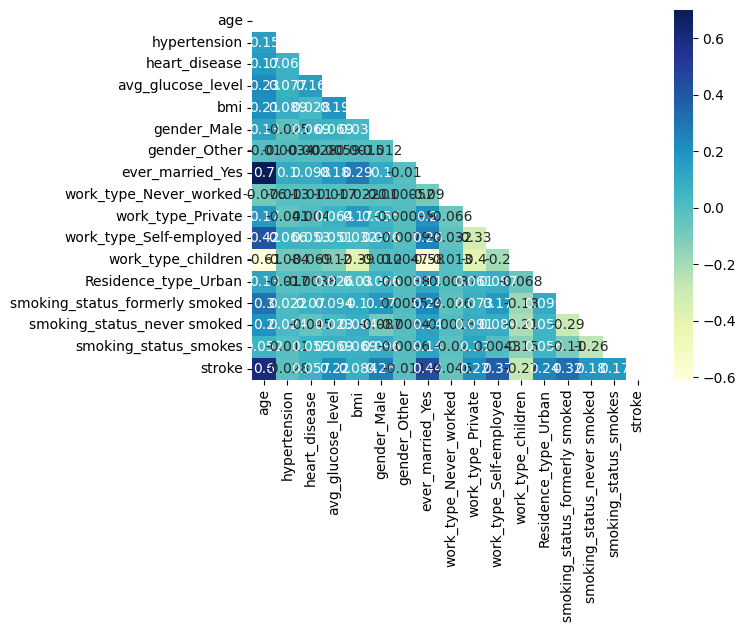

In [ ]:
sns.heatmap(corr_matrix, cmap="YlGnBu", annot=True, mask=mask)
plt.show()

In [ ]:
# correlation matrix
correlation_matrix = combine_data.corr()

# correlation between Stroke and other columns
correlation_with_stroke = correlation_matrix['stroke'].sort_values(ascending=False)


In [ ]:
correlation_with_stroke

stroke                            1.000000
age                               0.595643
ever_married_Yes                  0.443186
work_type_Self-employed           0.370315
smoking_status_formerly smoked    0.318545
gender_Male                       0.264836
Residence_type_Urban              0.241448
avg_glucose_level                 0.223862
work_type_Private                 0.219946
smoking_status_never smoked       0.181412
smoking_status_smokes             0.170365
bmi                               0.084332
heart_disease                     0.057269
gender_Other                     -0.011361
hypertension                     -0.027735
work_type_Never_worked           -0.045618
work_type_children               -0.272204
Name: stroke, dtype: float64

* chi square

In [ ]:
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler

for chi square method all the input values must be greater than 0

In [ ]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_sampled)

In [ ]:
chi2_scores, p_values = chi2(X_scaled, y_sampled)

In [ ]:
chi2_df = pd.DataFrame({
    'Feature': X_sampled.columns,  # Assuming X_sampled is a DataFrame
    'Chi2 Score': chi2_scores,
    'P-Value': p_values
}).sort_values(by='Chi2 Score', ascending=False)

In [ ]:
top_chi2_features = chi2_df.head(10)
print("Top 10 features based on chi-square scores:\n", top_chi2_features)

Top 10 features based on chi-square scores:
                            Feature   Chi2 Score        P-Value
10         work_type_Self-employed  7863.199971   0.000000e+00
13  smoking_status_formerly smoked  5888.762353   0.000000e+00
11              work_type_children  5851.782164   0.000000e+00
0                              age  3345.048585   0.000000e+00
7                 ever_married_Yes  3144.581590   0.000000e+00
5                      gender_Male  2752.146994   0.000000e+00
15           smoking_status_smokes  1925.616020   0.000000e+00
12            Residence_type_Urban  1895.999108   0.000000e+00
14     smoking_status_never smoked  1513.513798   0.000000e+00
9                work_type_Private  1338.567230  4.700190e-293


* chi2 score value - asssociation between feature and stroke
* high chi2 value means strong association
* p-value -- used to check results we got are real or just got randomly

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sampled, y_sampled, test_size=0.25, random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
train_preds = model.predict(X_train)
trainning_accuracy = accuracy_score(y_train, train_preds)
print(f'trainning_accuracy: {trainning_accuracy * 100} %')

trainning_accuracy: 87.56198670316778 %


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [ ]:
train_confusion_matrix = confusion_matrix(y_train, train_preds, normalize='true')
train_confusion_matrix

array([[0.86341036, 0.13658964],
       [0.11215802, 0.88784198]])

In [ ]:
test_preds = model.predict(X_test)
test_probs = model.predict_proba(X_test)[:, 1]

In [ ]:
testing_accuracy = accuracy_score(y_test, test_preds)
print(f'testing_accuracy: {testing_accuracy * 100} %')

testing_accuracy: 87.63433291097658 %


In [ ]:
test_confusion_matrix = confusion_matrix(y_test, test_preds, normalize='true')
test_confusion_matrix

array([[0.86369618, 0.13630382],
       [0.11104864, 0.88895136]])

### Embeded Methods Use feature importance from models (e.g., Random Forest, Gradient boosting method) forperforming the feature selection method
### Random Forest use multiple decision trees and for final output is perform averaging on them.
* we use the random forest because it is more suitable for dataset and its size
* provide more accuracy
* less run time


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import MinMaxScaler

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_sampled, y_sampled, test_size=0.25, random_state=42)

# Initialize the Random Forest classifier
rf = RandomForestClassifier(random_state=42)

In [ ]:
rf.fit(X_train, y_train)
feature_importances = rf.feature_importances_

In [ ]:
feature_importances_data = pd.DataFrame({
    'Feature': X_sampled.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

top_features = feature_importances_data.head(10)
print("top 10 important features:\n", top_features)

selected_features = top_features['Feature'].values
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

rf_final = RandomForestClassifier(n_estimators=100, random_state=42)
rf_final.fit(X_train_selected, y_train)

y_pred = rf_final.predict(X_test_selected)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

top 10 important features:
                            Feature  Importance
0                              age    0.320564
3                avg_glucose_level    0.123298
4                              bmi    0.111444
7                 ever_married_Yes    0.078959
10         work_type_Self-employed    0.071865
9                work_type_Private    0.052494
13  smoking_status_formerly smoked    0.050984
14     smoking_status_never smoked    0.043743
5                      gender_Male    0.040384
15           smoking_status_smokes    0.038438
0.9793045192172322


# Hyperparameter Tunning
### GridsearchCV
* Tries all possible combinations of a set of hyperparameters to find the best combination
* if take two hyperparameters, each with 3 possible values GridSearchCV will test all 3x3 = 9 combinations
* cv = 3 :- means 3 fold cross validation

In [ ]:
# # GridSearchCV
# param_grid = {
#     'n_estimators': [100, 200, 300],
#     'max_features': ['sqrt'],
#     'max_depth': [6, 8, 10],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'bootstrap': [True]
# }

# grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
# grid_search.fit(X_train, y_train)

# print("Best parameters from GridSearchCV:")
# print(grid_search.best_params_)

# # Evaluate best model from GridSearchCV
# best_grid_rf = grid_search.best_estimator_
# y_pred_grid = best_grid_rf.predict(X_test)
# accuracy_grid = accuracy_score(y_test, y_pred_grid)
# print("Accuracy with GridSearchCV:", accuracy_grid)

## getting 91.91 % accuracy even after trying and fitting 243 different combinatins of hyperparameters in model
* Best parameters from GridSearchCV:
{'bootstrap': True, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}

### basic function to try multiple models easily

In [ ]:
def try_model(model, X_train, y_train, X_test, y_test):
  model.fit(X_train, y_train)
  train_preds = model.predict(X_train)
  trainning_accuracy = accuracy_score(y_train, train_preds)

  test_preds = model.predict(X_test)
  testing_accuracy = accuracy_score(y_test, test_preds)
  return { "trainning_accuracy" : trainning_accuracy * 100,
          "testing_accuracy" : testing_accuracy * 100,
          }

# model training without feature selection i.e. using all features in the dataset

In [ ]:
model = LogisticRegression()
result = try_model(model, X_train, y_train, X_test, y_test)

for key, value in result.items():
    print(f"- {key}: {value}")

- trainning_accuracy: 87.56198670316778
- testing_accuracy: 87.63433291097658


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state = 42)
result = try_model(model, X_train, y_train, X_test, y_test)
for key, value in result.items():
    print(f"- {key}: {value}")

- trainning_accuracy: 99.99374266718812
- testing_accuracy: 96.77131728377681


In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state = 42,n_estimators=10)
result = try_model(model, X_train, y_train, X_test, y_test)
for key, value in result.items():
    print(f"- {key}: {value}")

- trainning_accuracy: 99.87954634337115
- testing_accuracy: 98.09939462199071


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier(random_state = 42)
result = try_model(model, X_train, y_train, X_test, y_test)
for key, value in result.items():
    print(f"- {key}: {value}")

- trainning_accuracy: 90.14157215486898
- testing_accuracy: 89.88220939509127


## Random forest model trainig on all the features of dataset using best parameters given by GridSearchCV after trying 243 fits

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(
    bootstrap=True,
    max_depth=10,
    max_features='sqrt',
    min_samples_leaf=1,
    min_samples_split=10,
    n_estimators=100
)
result = try_model(model, X_train, y_train, X_test, y_test)
for key, value in result.items():
    print(f"- {key}: {value}")

- trainning_accuracy: 92.12671098944075
- testing_accuracy: 91.7968933314562


### RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state = 42,n_estimators=10)
result = try_model(model, X_train, y_train, X_test, y_test)
for key, value in result.items():
    print(f"- {key}: {value}")

- trainning_accuracy: 99.87954634337115
- testing_accuracy: 98.09939462199071


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

### Confusion Matrix:

* True Positives (TP): Correctly predicted positive cases.
* True Negatives (TN): Correctly predicted negative cases.
* False Positives (FP): Incorrectly predicted positive cases.
* False Negatives (FN): Incorrectly predicted negative cases.

conf_matrix [[9188 1450]
 [1185 9486]]
tp_percent 44.5164015204843
tn_percent 43.11793139049228
fp_percent 6.804636538551785
fn_percent 5.5610305504716315
precision 0.8674103877103145
recall 0.8889513635085746
f1 0.8780487804878048
roc_auc 0.8763237735008562


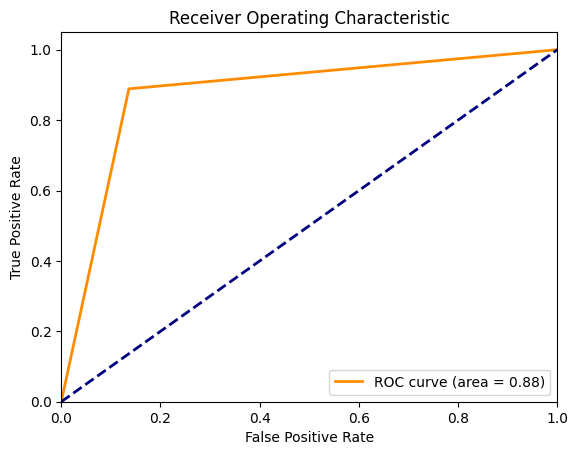

In [ ]:
conf_matrix = confusion_matrix(y_test, test_preds)
print(f"conf_matrix {conf_matrix}")
total = np.sum(conf_matrix)
tp_percent = (conf_matrix[1, 1] / total) * 100
print(f"tp_percent {tp_percent}")
tn_percent = (conf_matrix[0, 0] / total) * 100
print(f"tn_percent {tn_percent}")
fp_percent = (conf_matrix[0, 1] / total) * 100
print(f"fp_percent {fp_percent}")
fn_percent = (conf_matrix[1, 0] / total) * 100
print(f"fn_percent {fn_percent}")
precision = precision_score(y_test, test_preds)
print(f"precision {precision}")
recall = recall_score(y_test, test_preds)
print(f"recall {recall}")
f1 = f1_score(y_test, test_preds)
print(f"f1 {f1}")
roc_auc = roc_auc_score(y_test, test_preds)
print(f"roc_auc {roc_auc}")
fpr, tpr, _ = roc_curve(y_test, test_preds)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

### xgboost

In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, accuracy_score, classification_report
import xgboost as xgb

model = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]

y_test = y_test.astype(int)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.97


In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"conf_matrix\n{conf_matrix}")

# total number of predictions
total = np.sum(conf_matrix)

# percentage metrics
tp_percent = (np.diag(conf_matrix) / total) * 100
print(f"tp_percent {tp_percent}")

tn_percent = (conf_matrix.sum() - (conf_matrix.sum(axis=0) + conf_matrix.sum(axis=1) - np.diag(conf_matrix))) / total * 100
print(f"tn_percent {tn_percent}")

fp_percent = (conf_matrix.sum(axis=0) - np.diag(conf_matrix)) / total * 100
print(f"fp_percent {fp_percent}")

fn_percent = (conf_matrix.sum(axis=1) - np.diag(conf_matrix)) / total * 100
print(f"fn_percent {fn_percent}")

precision = precision_score(y_test, y_pred, average=None)
print(f"precision {precision}")

recall = recall_score(y_test, y_pred, average=None)
print(f"recall {recall}")

f1 = f1_score(y_test, y_pred, average=None)
print(f"f1 {f1}")

# ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"roc_auc {roc_auc}")

# ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)


conf_matrix
[[10246   392]
 [  348 10323]]
tp_percent [48.08296964 48.4443193 ]
tn_percent [48.4443193  48.08296964]
fp_percent [1.63311277 1.83959829]
fn_percent [1.83959829 1.63311277]
precision [0.96715122 0.96341577]
recall [0.96315097 0.96738825]
f1 [0.96514695 0.96539792]
roc_auc 0.9949946395331605


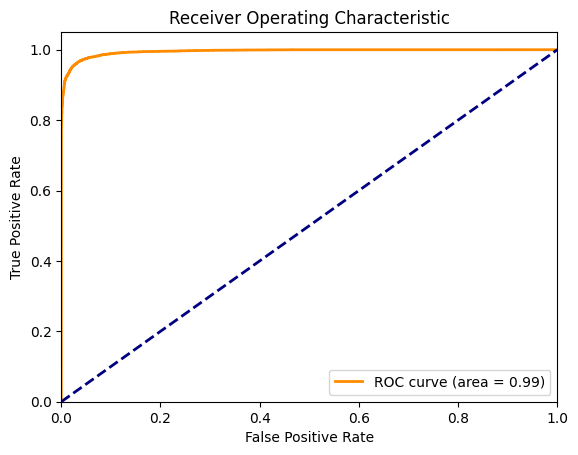

In [ ]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:0.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
class_report = classification_report(y_test, y_pred, target_names=['Class 0', 'Class 1'])
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.97      0.96      0.97     10638
     Class 1       0.96      0.97      0.97     10671

    accuracy                           0.97     21309
   macro avg       0.97      0.97      0.97     21309
weighted avg       0.97      0.97      0.97     21309



### KFold cross validation with xgboost

In [ ]:
model = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss')

# Define the k-fold cross-validation configuration
k = 5
kfold = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)

# Perform cross-validation and calculate the average scores
accuracy_scores = cross_val_score(model, X_sampled, y_sampled, cv=kfold, scoring='accuracy')
precision_scores = cross_val_score(model, X_sampled, y_sampled, cv=kfold, scoring='precision')
recall_scores = cross_val_score(model, X_sampled, y_sampled, cv=kfold, scoring='recall')
f1_scores = cross_val_score(model, X_sampled, y_sampled, cv=kfold, scoring='f1')
roc_auc_scores = cross_val_score(model, X_sampled, y_sampled, cv=kfold, scoring='roc_auc')

print(f'Average Accuracy: {np.mean(accuracy_scores):.2f} ± {np.std(accuracy_scores):.2f}')
print(f'Average Precision: {np.mean(precision_scores):.2f} ± {np.std(precision_scores):.2f}')
print(f'Average Recall: {np.mean(recall_scores):.2f} ± {np.std(recall_scores):.2f}')
print(f'Average F1 Score: {np.mean(f1_scores):.2f} ± {np.std(f1_scores):.2f}')
print(f'Average ROC AUC: {np.mean(roc_auc_scores):.2f} ± {np.std(roc_auc_scores):.2f}')

# Train and evaluate the model using the oversampled dataset
model.fit(X_sampled, y_sampled)
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Average Accuracy: 0.97 ± 0.00
Average Precision: 0.97 ± 0.01
Average Recall: 0.97 ± 0.00
Average F1 Score: 0.97 ± 0.00
Average ROC AUC: 1.00 ± 0.00
Accuracy: 0.98


### Confusion matrix

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"conf_matrix\n{conf_matrix}")

conf_matrix
[[10416   222]
 [  247 10424]]


In [ ]:
total = np.sum(conf_matrix)

### Percentage matrix

In [ ]:
tp_percent = (np.diag(conf_matrix) / total) * 100
print(f"tp_percent {tp_percent}")

tn_percent = (conf_matrix.sum() - (conf_matrix.sum(axis=0) + conf_matrix.sum(axis=1) - np.diag(conf_matrix))) / total * 100
print(f"tn_percent {tn_percent}")

fp_percent = (conf_matrix.sum(axis=0) - np.diag(conf_matrix)) / total * 100
print(f"fp_percent {fp_percent}")

fn_percent = (conf_matrix.sum(axis=1) - np.diag(conf_matrix)) / total * 100
print(f"fn_percent {fn_percent}")

tp_percent [48.88075461 48.91829743]
tn_percent [48.91829743 48.88075461]
fp_percent [1.15913464 1.04181332]
fn_percent [1.04181332 1.15913464]


In [ ]:
# Precision, Recall, F1-score for each class
precision = precision_score(y_test, y_pred, average=None)
print(f"precision {precision}")

recall = recall_score(y_test, y_pred, average=None)
print(f"recall {recall}")

f1 = f1_score(y_test, y_pred, average=None)
print(f"f1 {f1}")

# ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"roc_auc {roc_auc}")

# ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)

precision [0.97683579 0.9791471 ]
recall [0.97913142 0.97685315]
f1 [0.97798225 0.97799878]
roc_auc 0.9977573884298166


In [ ]:
class_report = classification_report(y_test, y_pred, target_names=['Class 0', 'Class 1'])
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.98      0.98      0.98     10638
     Class 1       0.98      0.98      0.98     10671

    accuracy                           0.98     21309
   macro avg       0.98      0.98      0.98     21309
weighted avg       0.98      0.98      0.98     21309



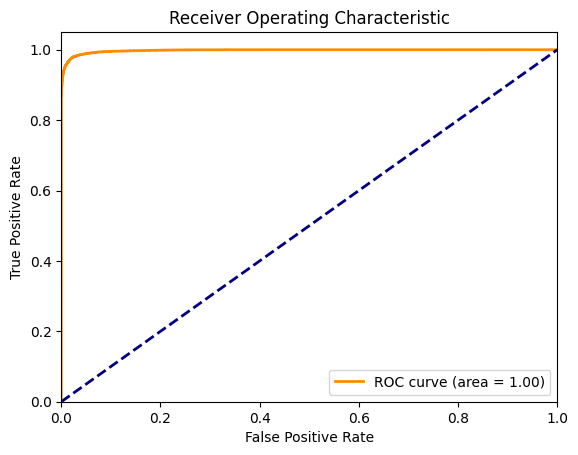

In [ ]:
#ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:0.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()